In [38]:
#importing the libraries here
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

%matplotlib inline

In [39]:
#the first step is loading the data and pre-processing
#Lets load the data into pandas dataframe
data = pd.read_csv("Breast_cancer_data.csv") 
data['diagnosis_flag'] = np.where(data['diagnosis']=='M', 1, 0)

train_data=data.sample(frac=0.8,random_state=200)
test_data=data.drop(train_data.index)

test = train_data['diagnosis_flag']
test_numpy = test.values
Y_train= (test_numpy.reshape((-1,1)))

test = test_data['diagnosis_flag']
test_numpy = test.values
Y_test= (test_numpy.reshape((-1,1)))

train = train_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_train=train_norm.values

test = test_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
test_norm = test.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_test=test_norm.values


#I will be transposing the metrices now so that the features are as row and number of
#datasets are as columns
Y = np.transpose(Y_train)
Y_test = np.transpose(Y_test)
X = np.transpose(X_train)
X_test = np.transpose(X_test)

print (Y.shape)
print (Y_test.shape)
print (X.shape)
print (X_test.shape)

(1, 455)
(1, 114)
(31, 455)
(31, 114)


In [40]:
#Next we will create the sigmoid function
def sigmoid (z):
    return np.exp(z)*1.00/(1+np.exp(z))

In [41]:
#Relu function
def relu (z):
    return (z * (z > 0))


In [42]:
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [43]:
#We will be creating a NN with 4 units in the hidden later
#So lets initialize the values in this architecture. In the input layer the number of units is
#equal to the number of features in training dataset. In the hidder layer lets use 4
#and in the output layer the number of units is 1. So the dimensions of 
#W1 is (4, number of features), b1 is (4,1) , W2(1,4), b2(1,1)

number_hidder_layers = 4
number_of_features = X.shape[0]
number_output = Y.shape[0]

W1 = np.random.randn(number_hidder_layers,number_of_features) * 0.01
b1 = np.zeros((number_hidder_layers,1))
W2 = np.random.randn(number_output,number_hidder_layers) * 0.01
b2 = np.zeros((number_output,1))

print (W1.shape)

(4, 31)


In [44]:
#Now that we have initialize the parameters (W and b), let's do forward prop so
#that we are able to get the prediction for a particular value of parameters
def forward_prop(W1,b1,W2,b2,X):
    A1 = relu(np.matmul(W1, X)+b1)
    return sigmoid(np.matmul(W2, A1)+b2),A1


In [47]:
#Next we will create the function to calculate the loss for a given prediction value
#This is the log-likelihood function where we sum the log of predictions if its 1 or
#log of (1- prediction) if its 0 and take a -ve of all that. Thus our goal is to minimize
#this loss function
def loss(W1,b1,W2,b2,X,Y):
    m = X.shape[1]
    A2,A1=forward_prop(W1,b1,W2,b2,X)
    return -1.00/m*np.sum((np.multiply(Y, np.log(A2))+np.multiply((1-Y), np.log(1-A2))))

print (loss(W1,b1,W2,b2,X,Y))

0.693106040539


In [50]:
def gradient (Y,X,prediction,A1,W2):
    m = X.shape[1]
    dZ2 = prediction - Y
    dW2 = 1.00/m*(np.dot(dZ2,np.transpose(A1)))
    db2 = 1.00/m*(np.sum(dZ2,axis=1,keepdims=True))
    
    dZ1 = np.multiply(np.matmul(np.transpose(W2), dZ2), reluDerivative(A1))
    dW1 = 1.00/m*np.matmul(dZ1,np.transpose(X))
    db1 = 1.00/m*(np.sum(dZ1,axis=1,keepdims=True))
    return dW1,db1,dW2,db2

In [55]:
learning_rate = 0.5
number_of_steps = 100
for i in range (number_of_steps):
    A2,A1 = forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2 = gradient(Y,X,A2,A1,W2)
    W1 = W1 - learning_rate* dW1
    b1 = b1 - learning_rate* db1
    W2 = W2 - learning_rate* dW2
    b2 = b2 - learning_rate* db2
    print (loss(W1,b1,W2,b2,X,Y))

0.654791907266
0.654252189129
0.653775043981
0.653334704461
0.652909197218
0.65247883778
0.652024728479
0.651528581743
0.650971597146
0.650333539068
0.649592056103
0.648722067076
0.6476950037
0.64647825428
0.645033179437
0.64331574502
0.641274744767
0.638851459005
0.635978295845
0.632580204718
0.62857274356
0.623864073278
0.61835586898
0.611946756873
0.604536447879
0.596033092702
0.586359259691
0.575463261714
0.563329666273
0.549985191777
0.535508512531
0.520033824077
0.503737726327
0.486827380816
0.469521389857
0.45203273802
0.43454457885
0.417251781204
0.400318250815
0.383866381106
0.368000224084
0.35279291157
0.338269072794
0.324456387203
0.311362138907
0.298983780042
0.287321523834
0.276370560009
0.266110303743
0.25649421652
0.247490935854
0.23906986192
0.231198372174
0.223837356142
0.216949517136
0.210502454023
0.204463799577
0.198801954607
0.193489562539
0.188498613771
0.183805224309
0.179385425011
0.175219118575
0.171287355874
0.167571713807
0.164056209029
0.160727198141
0.15757

In [59]:
def predict(X_train,Y_train,X_test,Y_test,learning_rate,number_of_steps):
   
    number_hidder_layers = 4
    number_of_features = X.shape[0]
    number_output = Y.shape[0]

    W1 = np.random.randn(number_hidder_layers,number_of_features) * 0.01
    b1 = np.zeros((number_hidder_layers,1))
    W2 = np.random.randn(number_output,number_hidder_layers) * 0.01
    b2 = np.zeros((number_output,1))
    
    test_accuracy = []
    iterations = []
    for i in range(number_of_steps):
        A2,A1 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = gradient(Y,X,A2,A1,W2)
        W1 = W1 - learning_rate* dW1
        b1 = b1 - learning_rate* db1
        W2 = W2 - learning_rate* dW2
        b2 = b2 - learning_rate* db2
        #print (loss(W,b,X_train,Y_train))
        A_test,A1_test = forward_prop(W1,b1,W2,b2,X_test)
        Y_prediction_test =  np.where(A_test > 0.5, 1, 0)
        #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        test_accuracy.append(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
        iterations.append(i)
        
        A_train,A1_train= forward_prop(W1,b1,W2,b2,X_train)
        Y_prediction_train =  np.where(A_train > 0.5, 1, 0)
        #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print (test_accuracy)
    test_accuracy = np.squeeze(test_accuracy)
    plt.plot(test_accuracy)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(iterations))
    plt.show()
    plt.plot(test_accuracy)

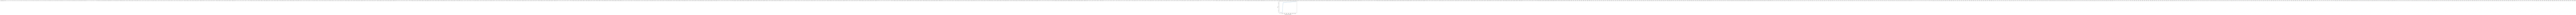

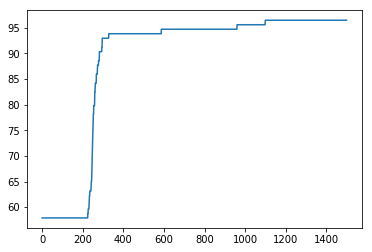

In [62]:
predict(X,Y,X_test,Y_test,0.1,1500)